<a href="https://colab.research.google.com/github/LeonardoBusculo/Aprovacao-de-alunos-no-ano-de-2017/blob/main/APROVA%C3%87%C3%83O_ALUNOS_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
aprovacao = pd.read_excel("/content/C+¦pia de aprovacao_alunos (1).xlsx")
aprovacao.head()

,UF,ano_2015,ano_2016
0,Rondonia,77,85
1,Acre,79,81
2,Amazonas,83,85
3,Roraima,81,82
4,Para,73,76


In [ ]:
aprovacao.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,79.333333,80.185185
std,4.969136,4.820126
min,68.000000,70.000000
25%,76.000000,76.500000
50%,80.000000,81.000000
75%,81.500000,82.500000
max,89.000000,91.000000


In [ ]:
aprovacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   UF        27 non-null     object
 1   ano_2015  27 non-null     int64 
 2   ano_2016  27 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 776.0+ bytes


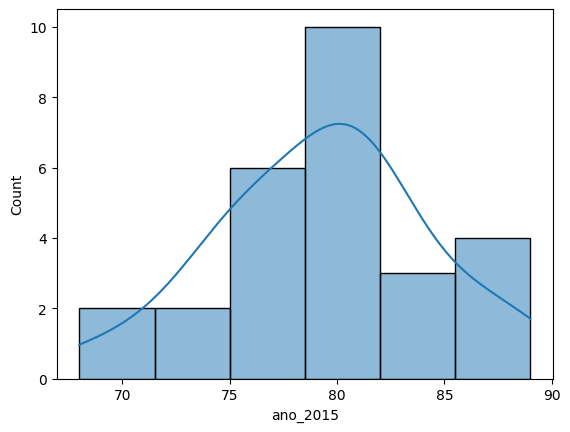

In [ ]:
sns.histplot(aprovacao, x ="ano_2015", kde = True);

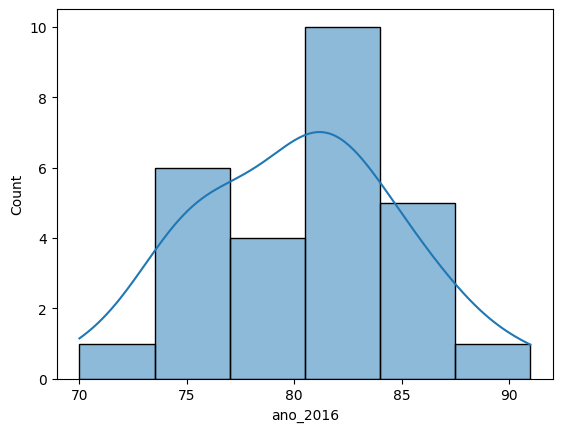

In [ ]:
sns.histplot(aprovacao, x ="ano_2016", kde = True);

In [ ]:
aprovacao.corr()

<ipython-input-21-2488ee107b56>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  aprovacao.corr()


,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


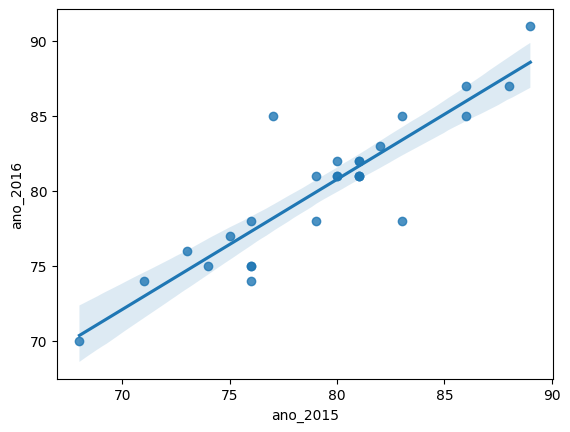

In [ ]:
sns.regplot( x = "ano_2015", y = "ano_2016", data = aprovacao);

In [ ]:
aprovacao.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,79.333333,80.185185
std,4.969136,4.820126
min,68.000000,70.000000
25%,76.000000,76.500000
50%,80.000000,81.000000
75%,81.500000,82.500000
max,89.000000,91.000000


In [ ]:
import statsmodels.formula.api as smf

In [ ]:
function = "ano_2016~ano_2015" # INTERCEPTO P>|t|
model = smf.ols(formula = function, data = aprovacao).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2016   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           3.02e-10
Time:                        18:11:05   Log-Likelihood:                -58.476
No. Observations:                  27   AIC:                             121.0
Df Residuals:                      25   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.3143      6.880      1.645      0.1

In [ ]:
X = aprovacao [["ano_2015"]]
Y = aprovacao [["ano_2016"]]


In [ ]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.20, random_state = 42)

lr = LinearRegression()

lr.fit(X_treino, Y_treino)

LinearRegression()

LinearRegression()

In [ ]:
r_sq = lr.score( X_treino, Y_treino)
print(r_sq)

0.880091005664028


In [ ]:
y_pred_treino = lr.predict(X_treino)
print("MAE:", metrics.mean_absolute_error(Y_treino, y_pred_treino))
print("MSE:", metrics.mean_squared_error(Y_treino, y_pred_treino))
print("RMSE:", np.sqrt(metrics.mean_squared_error(Y_treino, y_pred_treino)))

MAE: 1.325749471031548
MSE: 3.063797161400754
RMSE: 1.750370578306421


In [ ]:
lr.fit(X_teste, Y_teste)

LinearRegression()

In [ ]:
y_pred_teste = lr.predict(X_teste)
print("MAE:", metrics.mean_absolute_error(Y_teste, y_pred_teste))
print("MSE:", metrics.mean_squared_error(Y_teste, y_pred_teste))
print("RMSE:", np.sqrt(metrics.mean_squared_error(Y_teste, y_pred_teste)))

MAE: 1.889688249400481
MSE: 6.44764188649082
RMSE: 2.539220724255932
